# Task 6
## Task of Computer Vision & IoT
### Implement an image color detector which identifies all the colors in an image or video.
### Praveen Shahani

## Importing the Important libraries

In [4]:
import cv2 # library for computer vision and machine learning      
import pandas as pd    ## library for data analysis

## Picture to be loaded
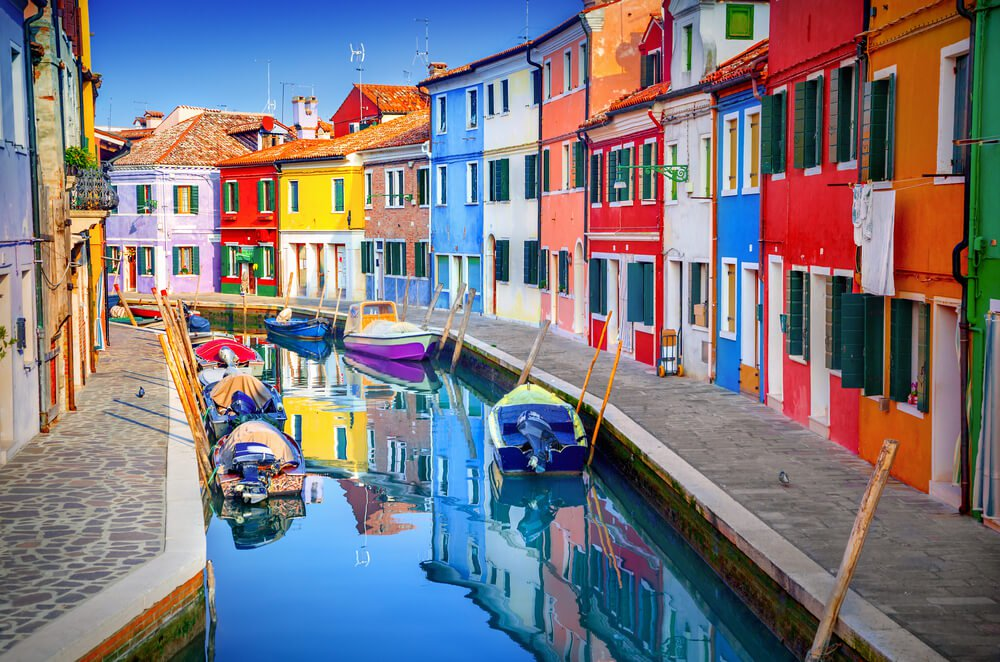

## Uploading the picture and converting into matrix form

In [5]:
img_path = (r"C:\Users\Praveen Shahani\Desktop\colorpic.jpg")
img = cv2.imread(img_path)
img 
##Matrix form
## The below is the matrix conversion from a picture

array([[[118,  35,  20],
        [117,  34,  19],
        [114,  32,  20],
        ...,
        [ 49,  73,  19],
        [ 50,  73,  19],
        [ 50,  73,  19]],

       [[117,  34,  19],
        [117,  34,  19],
        [115,  34,  19],
        ...,
        [ 53,  78,  20],
        [ 54,  79,  21],
        [ 55,  80,  22]],

       [[117,  37,  20],
        [117,  37,  20],
        [116,  35,  20],
        ...,
        [ 50,  81,  12],
        [ 49,  80,  11],
        [ 48,  79,  10]],

       ...,

       [[118, 123, 122],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 38,  32,  33],
        [ 38,  30,  31],
        [ 36,  28,  29]],

       [[119, 124, 123],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 40,  34,  35],
        [ 40,  32,  33],
        [ 39,  31,  32]],

       [[119, 124, 123],
        [119, 124, 123],
        [120, 124, 125],
        ...,
        [ 40,  35,  36],
        [ 42,  34,  35],
        [ 41,  33,  34]]

## Uploading Dataset of from which the Program would learn and interpret

In [6]:
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv(r'C:\Users\Praveen Shahani\Downloads\colors.csv', names=index, header=None)
csv
## This is how my data looks like
## the values in the hex are the color codes
## the program learns from the dataset

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


## Assigning functions to understand the color

In [7]:
def getColorName(R,G,B):
    minimum = 1000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<minimum):
            minimum = d
            color_name = csv.loc[i,"color_name"]
    return color_name

In [8]:
clicked = False
r = g = b = xpos = ypos = 0

## Function for representing the color combination

In [9]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

## Framing the execution

In [10]:
cv2.namedWindow('color detection')
cv2.setMouseCallback('color detection',draw_function)

In [ ]:
while(1):
    
    cv2.imshow("color detection",img)
    if (clicked):
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        color_name = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        cv2.putText(img, color_name,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        if(r+g+b>=600):
            cv2.putText(img, color_name,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
    #when user hit esc
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()